In [1]:
# !wget -O fluocells.zip http://amsacta.unibo.it/6706/1/fluocells.zip
# !unzip fluocells.zip

In [2]:
# %%capture
# !unzip ConferenceVideoSegmentationDataset.zip

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
import os
import numpy as np
from PIL import Image
import cv2

In [20]:
def make_mask(data, index=0):
    return torch.where(data[index] > 0.3, 1.0, 0.).detach().cpu().numpy()[0]

In [21]:
class SegNN(nn.Module):
    def __init__(self):
        super(SegNN, self).__init__()
        
        self.first_part = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(64),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(),
        )
        
        self.second_part = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
        f = self.first_part(x)
        return self.second_part(f)

In [23]:
class ConferenceDataset(Dataset):
    def __init__(self):
        
        self.images_path = './ConferenceVideoSegmentationDataset/original_training/'
        self.masks_path = './ConferenceVideoSegmentationDataset/ground_truth_training/'
        
        self.images_names = np.sort(os.listdir(self.images_path))[1:] # limiting the dataset size
        self.masks_names = np.sort(os.listdir(self.masks_path))[1:]
  
    def __len__(self):
        return len(self.images_names)

    def __getitem__(self, idx):
        
        im = np.array(Image.open(self.images_path + self.images_names[idx]).convert('L'))/255.
        
        im = cv2.resize(im, (320,180))
        im = torch.from_numpy(np.array([im])).permute(0, 1, 2).cuda().float()
        
        m = np.array(Image.open(self.masks_path + self.masks_names[idx]).convert('L'))/255.
        m = cv2.resize(m, (320,180))
        m = torch.from_numpy(np.array([m])).permute(0, 1, 2).cuda().float()
        
        return im, m

In [24]:
data = ConferenceDataset()

d1_len = (len(data)//5) * 4

dataset1, dataset2 = torch.utils.data.random_split(data, [d1_len, len(data) - d1_len])

In [25]:
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=4, shuffle=True)

In [28]:
model = SegNN().cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-1)
criterion = nn.BCELoss()

Train Epoch: 0 [0/1060 (0%)]	Loss: 0.775530
Train Epoch: 0 [40/1060 (4%)]	Loss: 0.522413
Train Epoch: 0 [80/1060 (8%)]	Loss: 0.459191
Train Epoch: 0 [120/1060 (11%)]	Loss: 0.416253
Train Epoch: 0 [160/1060 (15%)]	Loss: 0.305551
Train Epoch: 0 [200/1060 (19%)]	Loss: 0.401496
Train Epoch: 0 [240/1060 (23%)]	Loss: 0.476254
Train Epoch: 0 [280/1060 (26%)]	Loss: 0.303944
Train Epoch: 0 [320/1060 (30%)]	Loss: 0.412828
Train Epoch: 0 [360/1060 (34%)]	Loss: 0.399903
Train Epoch: 0 [400/1060 (38%)]	Loss: 0.318205
Train Epoch: 0 [440/1060 (42%)]	Loss: 0.418622
Train Epoch: 0 [480/1060 (45%)]	Loss: 0.323456
Train Epoch: 0 [520/1060 (49%)]	Loss: 0.409431
Train Epoch: 0 [560/1060 (53%)]	Loss: 0.327782
Train Epoch: 0 [600/1060 (57%)]	Loss: 0.368555
Train Epoch: 0 [640/1060 (60%)]	Loss: 0.328174
Train Epoch: 0 [680/1060 (64%)]	Loss: 0.377325
Train Epoch: 0 [720/1060 (68%)]	Loss: 0.412021
Train Epoch: 0 [760/1060 (72%)]	Loss: 0.320427
Train Epoch: 0 [800/1060 (75%)]	Loss: 0.303160
Train Epoch: 0 [840/

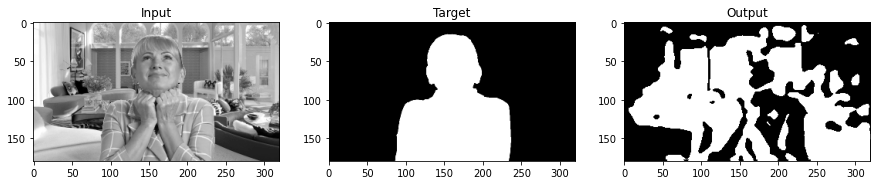

Train Epoch: 1 [0/1060 (0%)]	Loss: 0.290658
Train Epoch: 1 [40/1060 (4%)]	Loss: 0.441220
Train Epoch: 1 [80/1060 (8%)]	Loss: 0.394767
Train Epoch: 1 [120/1060 (11%)]	Loss: 0.360900
Train Epoch: 1 [160/1060 (15%)]	Loss: 0.523148
Train Epoch: 1 [200/1060 (19%)]	Loss: 0.283918
Train Epoch: 1 [240/1060 (23%)]	Loss: 0.484710
Train Epoch: 1 [280/1060 (26%)]	Loss: 0.339202
Train Epoch: 1 [320/1060 (30%)]	Loss: 0.357756
Train Epoch: 1 [360/1060 (34%)]	Loss: 0.257854
Train Epoch: 1 [400/1060 (38%)]	Loss: 0.278939
Train Epoch: 1 [440/1060 (42%)]	Loss: 0.255771
Train Epoch: 1 [480/1060 (45%)]	Loss: 0.396372
Train Epoch: 1 [520/1060 (49%)]	Loss: 0.276995
Train Epoch: 1 [560/1060 (53%)]	Loss: 0.317731
Train Epoch: 1 [600/1060 (57%)]	Loss: 0.221695
Train Epoch: 1 [640/1060 (60%)]	Loss: 0.233882
Train Epoch: 1 [680/1060 (64%)]	Loss: 0.231875
Train Epoch: 1 [720/1060 (68%)]	Loss: 0.440493
Train Epoch: 1 [760/1060 (72%)]	Loss: 0.191470
Train Epoch: 1 [800/1060 (75%)]	Loss: 0.228998
Train Epoch: 1 [840/

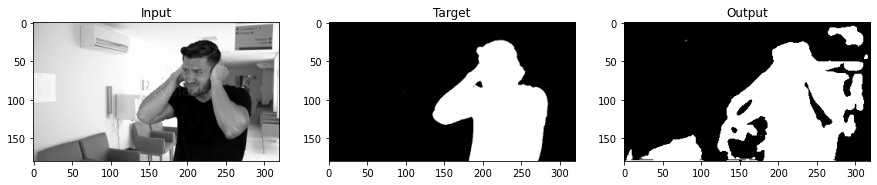

Train Epoch: 2 [0/1060 (0%)]	Loss: 0.196883
Train Epoch: 2 [40/1060 (4%)]	Loss: 0.189640
Train Epoch: 2 [80/1060 (8%)]	Loss: 0.169334
Train Epoch: 2 [120/1060 (11%)]	Loss: 0.179562
Train Epoch: 2 [160/1060 (15%)]	Loss: 0.224034
Train Epoch: 2 [200/1060 (19%)]	Loss: 0.282223
Train Epoch: 2 [240/1060 (23%)]	Loss: 0.194437
Train Epoch: 2 [280/1060 (26%)]	Loss: 0.224115
Train Epoch: 2 [320/1060 (30%)]	Loss: 0.158331
Train Epoch: 2 [360/1060 (34%)]	Loss: 0.194864
Train Epoch: 2 [400/1060 (38%)]	Loss: 0.214710
Train Epoch: 2 [440/1060 (42%)]	Loss: 0.283383
Train Epoch: 2 [480/1060 (45%)]	Loss: 0.195998
Train Epoch: 2 [520/1060 (49%)]	Loss: 0.134901
Train Epoch: 2 [560/1060 (53%)]	Loss: 0.232493
Train Epoch: 2 [600/1060 (57%)]	Loss: 0.211666
Train Epoch: 2 [640/1060 (60%)]	Loss: 0.135891
Train Epoch: 2 [680/1060 (64%)]	Loss: 0.169717
Train Epoch: 2 [720/1060 (68%)]	Loss: 0.124315
Train Epoch: 2 [760/1060 (72%)]	Loss: 0.179762
Train Epoch: 2 [800/1060 (75%)]	Loss: 0.156465
Train Epoch: 2 [840/

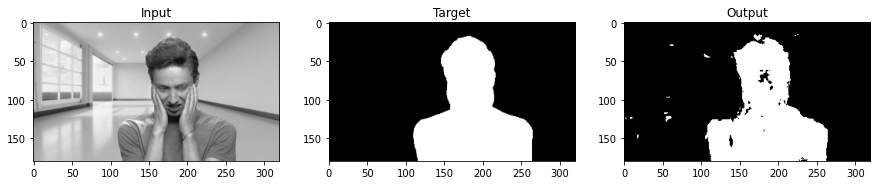

Train Epoch: 3 [0/1060 (0%)]	Loss: 0.089922
Train Epoch: 3 [40/1060 (4%)]	Loss: 0.174716
Train Epoch: 3 [80/1060 (8%)]	Loss: 0.168417
Train Epoch: 3 [120/1060 (11%)]	Loss: 0.115282
Train Epoch: 3 [160/1060 (15%)]	Loss: 0.198393
Train Epoch: 3 [200/1060 (19%)]	Loss: 0.157201
Train Epoch: 3 [240/1060 (23%)]	Loss: 0.167131
Train Epoch: 3 [280/1060 (26%)]	Loss: 0.142531
Train Epoch: 3 [320/1060 (30%)]	Loss: 0.088425
Train Epoch: 3 [360/1060 (34%)]	Loss: 0.211947
Train Epoch: 3 [400/1060 (38%)]	Loss: 0.117708
Train Epoch: 3 [440/1060 (42%)]	Loss: 0.086981
Train Epoch: 3 [480/1060 (45%)]	Loss: 0.132238
Train Epoch: 3 [520/1060 (49%)]	Loss: 0.083861
Train Epoch: 3 [560/1060 (53%)]	Loss: 0.120068
Train Epoch: 3 [600/1060 (57%)]	Loss: 0.107484
Train Epoch: 3 [640/1060 (60%)]	Loss: 0.080251
Train Epoch: 3 [680/1060 (64%)]	Loss: 0.105536
Train Epoch: 3 [720/1060 (68%)]	Loss: 0.086137
Train Epoch: 3 [760/1060 (72%)]	Loss: 0.072489
Train Epoch: 3 [800/1060 (75%)]	Loss: 0.085161
Train Epoch: 3 [840/

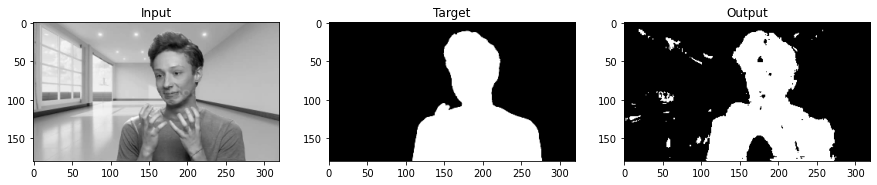

Train Epoch: 4 [0/1060 (0%)]	Loss: 0.131239
Train Epoch: 4 [40/1060 (4%)]	Loss: 0.095544
Train Epoch: 4 [80/1060 (8%)]	Loss: 0.093845
Train Epoch: 4 [120/1060 (11%)]	Loss: 0.109629
Train Epoch: 4 [160/1060 (15%)]	Loss: 0.086408
Train Epoch: 4 [200/1060 (19%)]	Loss: 0.176236
Train Epoch: 4 [240/1060 (23%)]	Loss: 0.067209
Train Epoch: 4 [280/1060 (26%)]	Loss: 0.118973
Train Epoch: 4 [320/1060 (30%)]	Loss: 0.106303
Train Epoch: 4 [360/1060 (34%)]	Loss: 0.092031
Train Epoch: 4 [400/1060 (38%)]	Loss: 0.088364
Train Epoch: 4 [440/1060 (42%)]	Loss: 0.115325
Train Epoch: 4 [480/1060 (45%)]	Loss: 0.080821
Train Epoch: 4 [520/1060 (49%)]	Loss: 0.081175
Train Epoch: 4 [560/1060 (53%)]	Loss: 0.086129
Train Epoch: 4 [600/1060 (57%)]	Loss: 0.100988
Train Epoch: 4 [640/1060 (60%)]	Loss: 0.079996
Train Epoch: 4 [680/1060 (64%)]	Loss: 0.084028
Train Epoch: 4 [720/1060 (68%)]	Loss: 0.079634
Train Epoch: 4 [760/1060 (72%)]	Loss: 0.092968
Train Epoch: 4 [800/1060 (75%)]	Loss: 0.100461
Train Epoch: 4 [840/

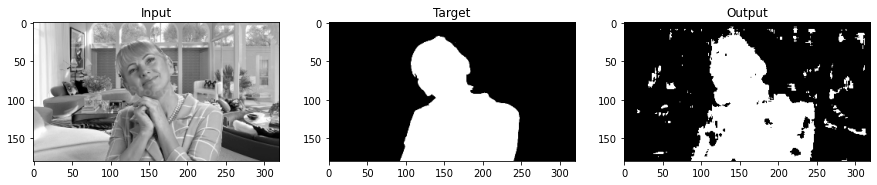

In [29]:
model.train()

INDEX=0

multiplier_init = 0.7
multiplier = multiplier_init

for epoch in range(5):
    for batch_idx, (data, target) in enumerate(train_loader):
        
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
    a1 = data[INDEX]
    a2 = target.detach().cpu().numpy()[INDEX,0]

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(a1.detach().cpu()[0], cmap='gray')
    plt.title('Input')
    plt.subplot(1,3,2)
    plt.imshow(a2, cmap='gray')
    plt.title('Target')
    plt.subplot(1,3,3)
    plt.imshow(make_mask(output, INDEX), cmap='gray')
    plt.title('Output')
    plt.show()
            
    if epoch % 5 == 0:
        optimizer = optim.Adam(model.parameters(), lr=1e-2 * multiplier)
        multiplier *= multiplier_init

---

In [30]:
class AttackerNN(nn.Module):
    def __init__(self):
        super(AttackerNN, self).__init__()
        self.layers = nn.Sequential(
            nn.ConvTranspose2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.LeakyReLU(),
            nn.ConvTranspose2d(in_channels=16, out_channels=1, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid(),
        )
        
    def forward(self, x):
        return self.layers(x)

In [31]:
test_loader = torch.utils.data.DataLoader(dataset2, batch_size=4, shuffle=True)

Attacker train epoch: 0	Loss: 0.008770
Attacker train epoch: 1	Loss: 0.010346
Attacker train epoch: 2	Loss: 0.005961
Attacker train epoch: 3	Loss: 0.004633
Attacker train epoch: 4	Loss: 0.004452


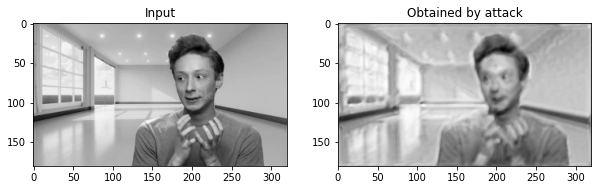

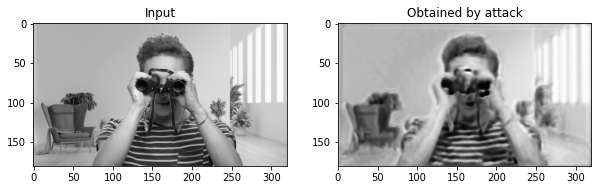

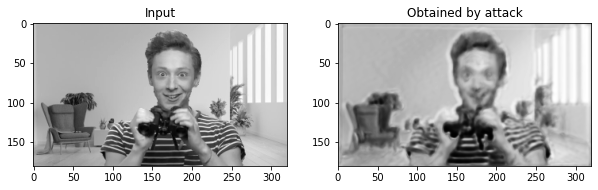

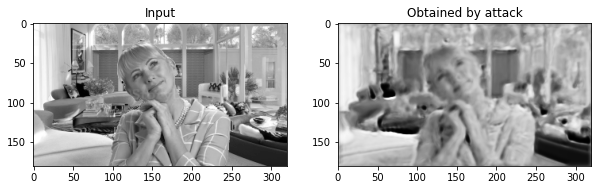

In [33]:
EPOCHS=5

model.eval()

attacker_model = AttackerNN().cuda()
optimiser = optim.Adam(attacker_model.parameters(), lr=1e-2)

attacker_model.train()

for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(test_loader):

        optimiser.zero_grad()

        target_outputs = model.first_part(data)

        attack_outputs = attacker_model(target_outputs)

        loss = ((data - attack_outputs)**2).mean()

        loss.backward()
        optimiser.step()
        
    if epoch % 1 == 0:
        print('Attacker train epoch: {}\tLoss: {:.6f}'.format(epoch, loss.item()))
        
    if epoch == (EPOCHS - 1):
        for batch_idx, (data, target) in enumerate(test_loader):

            target_outputs = model.first_part(data)
            attack_outputs = attacker_model(target_outputs)
            loss = ((data - attack_outputs)**2).mean()

            for i in range(len(data)):

                im_input = data[i].detach().cpu()[0]
                im_attack = attack_outputs[i].detach().cpu()[0]

                plt.figure(figsize=(10,10))
                plt.subplot(1,2,1)
                plt.imshow(im_input, cmap='gray')
                plt.title('Input')
                plt.subplot(1,2,2)
                plt.imshow(im_attack, cmap='gray')
                plt.title('Obtained by attack')
                plt.show()
                
            break